In [5]:
import pandas as pd

# Load your dataset
ronaldo_shots = pd.read_csv("cristiano_ronaldo_shots_with_outcomes.csv")

# Check coordinate ranges for the dataset
print("pos_orig_x range:", df['pos_orig_x'].min(), "to", df['pos_orig_x'].max())
print("pos_orig_y range:", df['pos_orig_y'].min(), "to", df['pos_orig_y'].max())
print("pos_dest_x range:", df['pos_dest_x'].min(), "to", df['pos_dest_x'].max())
print("pos_dest_y range:", df['pos_dest_y'].min(), "to", df['pos_dest_y'].max())




pos_orig_x range: 0 to 100
pos_orig_y range: 0 to 100
pos_dest_x range: 0 to 100
pos_dest_y range: 0 to 100


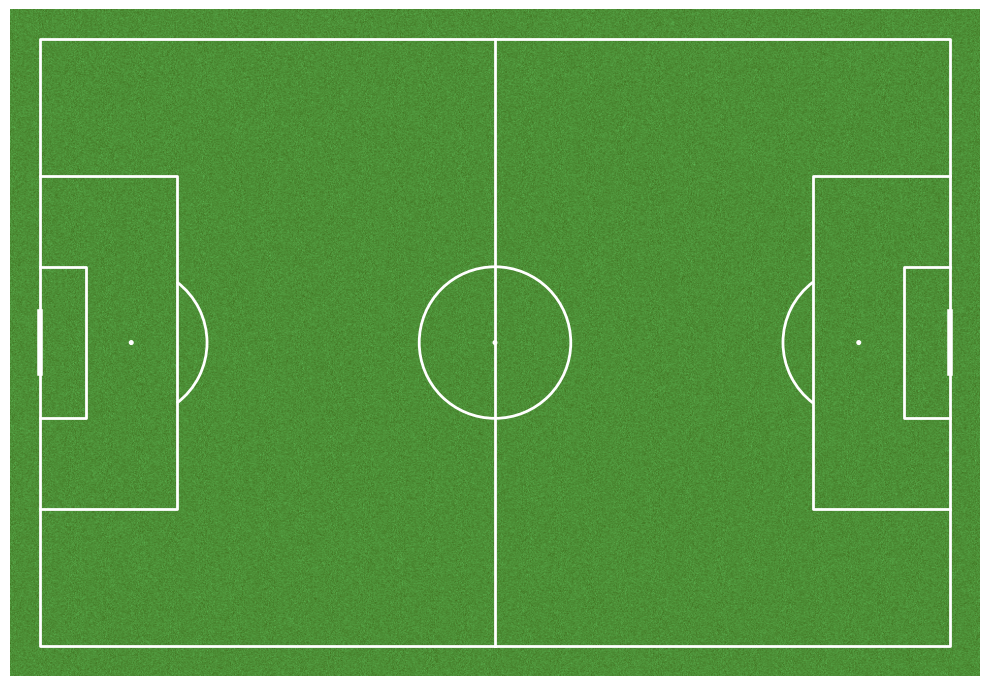

In [7]:
# Importing pitch from mplsoccer
from mplsoccer import Pitch
import matplotlib.pyplot as plt

# Create a pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = pitch.draw(figsize=(10, 7))
plt.show() 